# UTS

<b>IDENTITAS</b>

KELOMPOK 2

Anggota :

Auryno Nagata Adyatma   (2041720126) 

Irba Adika Jaya         (2041720175) 

Primo Afga Parlevi      (2041720021) 

Nicola Arieska Fonda    (2041720220) 

Kelas: TI/3A

## Deteksi Emosi Pengguna Twitter

Deteksi emosi merupakan salah satu permasalahan yang dihadapi pada ***Natural Language Processing*** (NLP). Alasanya diantaranya adalah kurangnya dataset berlabel untuk mengklasifikasikan emosi berdasarkan data twitter. Selain itu, sifat dari data twitter yang dapat memiliki banyak label emosi (***multi-class***). Manusia memiliki berbagai emosi dan sulit untuk mengumpulkan data yang cukup untuk setiap emosi. Oleh karena itu, masalah ketidakseimbangan kelas akan muncul (***class imbalance***). Pada Ujian Tengah Semester (UTS) kali ini, Anda telah disediakan dataset teks twitter yang sudah memiliki label untuk beberapa kelas emosi. Tugas utama Anda adalah membuat model yang mumpuni untuk kebutuhan klasifikasi emosi berdasarkan teks.

### Informasi Data

Dataset yang akan digunakan adalah ****tweet_emotion.csv***. Berikut merupakan informasi tentang dataset yang dapat membantu Anda.

- Total data: 40000 data
- Label emosi: anger, boredom, empty, enthusiasm, fun, happiness, hate, love, neutral, relief, sadness, surprise, worry
- Jumlah data untuk setiap label tidak sama (***class imbalance***)
- Terdapat 3 kolom = 'tweet_id', 'sentiment', 'content'

### Penilaian UTS

UTS akan dinilai berdasaarkan 4 proses yang akan Anda lakukan, yaitu pra pengolahan data, ektraksi fitur, pembuatan model machine learning, dan evaluasi.

#### Pra Pengolahan Data

> **Perhatian**
> 
> Sebelum Anda melakukan sesuatu terhadap data Anda, pastikan data yang Anda miliki sudah "baik", bebas dari data yang hilang, menggunakan tipe data yang sesuai, dan sebagainya.
>

Data tweeter yang ada dapatkan merupakan sebuah data mentah, maka beberapa hal dapat Anda lakukan (namun tidak terbatas pada) yaitu,

1. Case Folding
2. Tokenizing
3. Filtering
4. Stemming

*CATATAN: PADA DATA TWITTER TERDAPAT *MENTION* (@something) YANG ANDA HARUS TANGANI SEBELUM MASUK KE TAHAP EKSTRAKSI FITUR*

#### Ekstrasi Fitur

Anda dapat menggunakan beberapa metode, diantaranya

1. Bag of Words (Count / TF-IDF)
2. N-gram
3. dan sebagainya

#### Pembuatan Model

Anda dibebaskan dalam memilih algoritma klasifikasi. Anda dapat menggunakan algoritma yang telah diajarkan didalam kelas atau yang lain, namun dengan catatan. Berdasarkan asas akuntabilitas pada pengembangan model machine learning, Anda harus dapat menjelaskan bagaimana model Anda dapat menghasilkan nilai tertentu.

#### Evaluasi

Pada proses evaluasi, minimal Anda harus menggunakan metric akurasi. Akan tetapi Anda juga dapat menambahkan metric lain seperti Recall, Precision, F1-Score, detail Confussion Metric, ataupun Area Under Curve (AUC).

### Lembar Pengerjaan
Lembar pengerjaan dimulai dari cell dibawah ini

In [3]:
import numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('tweet_emotions.csv')

df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [5]:
# Case Folding
import nltk
import re, string, unicodedata

def remove_username(text):
    return re.sub(r'@[^\s]+','', text)

def remove_url(text):
    return re.sub(r'http\S+','', text)

def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-Z0-9\s]'
    text=re.sub(pattern,'',text)
    return text



In [6]:
# FILTERING (Stopword Removal)
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
  
sw = stopwords.words("english")

def filtering_lower(text):
    filter= []
    for i in text.split():
        if i.strip().lower() not in sw and i.strip().lower().isalpha():
            filter.append(i.strip().lower())
    return " ".join(filter)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
# STEMMER
def stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text=' '.join([ps.stem(word) for word in text.split()])
    return text

In [8]:
# EXECUTION

def preprocessing(text):
    # case folding
    text = remove_username(text)
    text = remove_url(text)
    text = remove_special_characters(text, remove_digits=True)
    # filtering
    text = filtering_lower(text)
    # stemming
    text = stemmer(text)
    return text

df['final'] = df['content'].apply(preprocessing)

df.head()


,tweet_id,sentiment,content,final
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier start freakin ...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,layin n bed headach ughhhhwaitin call
2,1956967696,sadness,Funeral ceremony...gloomy friday...,funer ceremonygloomi friday
3,1956967789,enthusiasm,wants to hang out with friends SOON!,want hang friend soon
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,want trade someon houston ticket one


In [9]:
# check data each emotions 
df["sentiment"].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

In [10]:
# mengubah data kategori menjadi numerik
new_labels = {
    'anger': 0,
    'boredom': 1,
    'empty': 2,
    'enthusiasm': 3,
    'fun': 4,
    'happiness': 5,
    'hate': 6,
    'love': 7,
    'neutral': 8,
    'relief': 9,
    'sadness': 10,
    'surprise': 11,
    'worry': 12
}

#Encode labels
df['sentiment'] = df['sentiment'].map(new_labels)
df.head()

,tweet_id,sentiment,content,final
0,1956967341,2,@tiffanylue i know i was listenin to bad habi...,know listenin bad habit earlier start freakin ...
1,1956967666,10,Layin n bed with a headache ughhhh...waitin o...,layin n bed headach ughhhhwaitin call
2,1956967696,10,Funeral ceremony...gloomy friday...,funer ceremonygloomi friday
3,1956967789,3,wants to hang out with friends SOON!,want hang friend soon
4,1956968416,8,@dannycastillo We want to trade with someone w...,want trade someon houston ticket one


In [11]:
# Split Data
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer()

X = tfidf_vect.fit_transform(df["final"])
y = df["sentiment"]

In [12]:
#Split Data Training dan Data Testing
from sklearn.model_selection import train_test_split

X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [13]:
#Training And Evaluating Model
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score,classification_report

# C-Support Vector Classification
model = SVC()

# Trainingg
model.fit(X,y)

#prediksi data testing
y_pred_test = model.predict(X_test)

#prediksi data training
y_pred_train = model.predict(X_train)  

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Menghitung Precission
precission = precision_score(y_test, y_pred_test, average='weighted',zero_division=0)

print(classification_report(y_test, y_pred_test, target_names=new_labels.keys(),zero_division=0))

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')
print(f'Hasil presisi data test: {precission}')

              precision    recall  f1-score   support

       anger       0.00      0.00      0.00        36
     boredom       1.00      0.09      0.16        46
       empty       0.86      0.05      0.09       254
  enthusiasm       1.00      0.01      0.03       219
         fun       0.98      0.35      0.52       533
   happiness       0.73      0.82      0.77      1589
        hate       0.84      0.47      0.61       369
        love       0.78      0.72      0.75      1163
     neutral       0.62      0.91      0.74      2621
      relief       0.94      0.22      0.36       465
     sadness       0.87      0.76      0.81      1538
    surprise       0.97      0.30      0.45       655
       worry       0.71      0.91      0.80      2512

    accuracy                           0.72     12000
   macro avg       0.79      0.43      0.47     12000
weighted avg       0.77      0.72      0.69     12000

Hasil akurasi data train: 0.72475
Hasil akurasi data test: 0.7213333333333334
H

Text(114.0, 0.5, 'Truth')

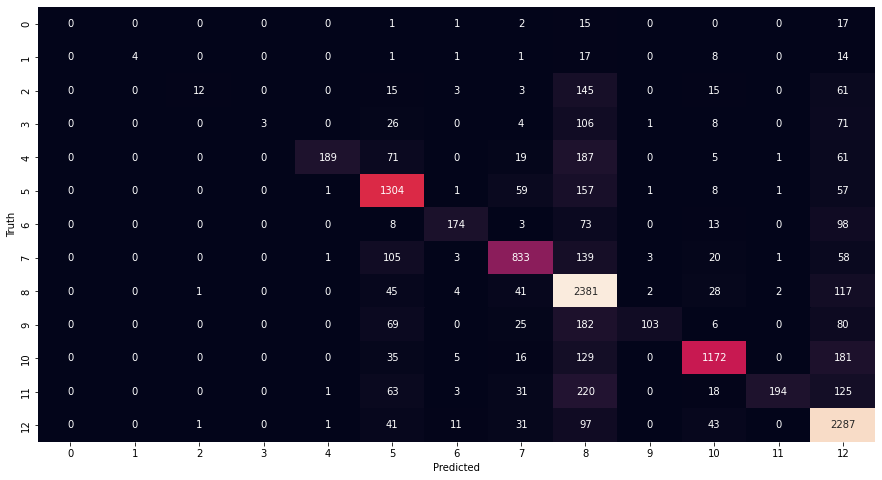

In [14]:
#Menampilkan detail dari hasil prediksi yang diberikan oleh classification model yang kita buat dengan confusion matrix
#mengimplementasikan testing data dan hasil prediksi dalam confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
cm = confusion_matrix(y_test, y_pred_test)
 
#membuat plotting confusion matrix
%matplotlib inline
plt.figure (figsize=(15,8))
sn.heatmap(cm, annot=True, cbar=False, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<b>KESIMPULAN</b>

Dari hasil percobaan diatas menggunakan model Machine Learning SVC dapat menghasilkan akurasi yang cukup tinggi yaitu hasil akurasi data train sebesar 72%, akurasi data test 72% dan akurasi data test 76%, yang mana hasil akurasi data dapat dilihat pada confussion matrix bahwa dari data emotions ke 4 sampai ke 12 sesuai dengan data yang di prediksikan memperoleh hasil yang cukup tinggi di banding data yang salah prediksi